In [1]:
"""MC3P3 Best Possible Strategy"""

import pandas as pd
import numpy as np
import datetime as dt
from util import get_data, get_data2, plot_data
import matplotlib.pyplot as plt
from marketsim import compute_portvals, portfolio_stat

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

# calculate and return normalized dataframe
def normalize(df):
    #result = pd.DataFrame({'Normalized Price': df / df.ix[0]})
    return df / df.ix[0]

# calculate and return standardized dataframe
def standardize(df):
    return (df-df.mean(axis=0))/df.std(axis=0)

def author():
    return 'zzhao38'  # Georgia Tech username.

In [2]:
# in sample start and end dates
sd_train = dt.datetime(2008, 1, 1)
ed_train = dt.datetime(2009, 12, 31)

# out of sample start and end dates
sd_test = dt.datetime(2010, 1, 1)
ed_test = dt.datetime(2011, 12, 31)

dates_train = pd.date_range(sd_train, ed_train)
dates_test = pd.date_range(sd_test, ed_test)

symbols = ['AAPL']

df_train = get_data2(symbols, dates_train)
df_test = get_data2(symbols, dates_test)

df_train_price = df_train.ix[:,0]
df_train_volume = df_train.ix[:,1]

df_train_price_norm = normalize(df_train_price)

In [3]:
# calculate daily return
daily_return = df_train_price_norm.pct_change(1)
order_best = pd.DataFrame()

# If next day there is positive return => long today, close tomorrow 
# if next day there is negative return => short today, close tomorrow
for i in range(daily_return.shape[0]-1):
    if daily_return[i+1] > 0.0:
        order_best = order_best.append({'Date':daily_return.index[i], 'Symbol':'AAPL', 'Order':'BUY', 'Shares':200}, ignore_index=True)
        order_best = order_best.append({'Date':daily_return.index[i+1], 'Symbol':'AAPL', 'Order':'SELL', 'Shares':200}, ignore_index=True)
    elif daily_return[i+1] < 0.0:
        order_best = order_best.append({'Date':daily_return.index[i], 'Symbol':'AAPL', 'Order':'SELL', 'Shares':200},ignore_index=True)
        order_best = order_best.append({'Date':daily_return.index[i+1], 'Symbol':'AAPL', 'Order':'BUY', 'Shares':200},ignore_index=True)
        
order_best.index = order_best['Date']
del order_best['Date']

# save as .csv file
order_best.to_csv('./orders/order_best.csv')

portfolio_benchmark = compute_portvals('./orders/order_benchmark.csv', start_val=100000)
best_possible = compute_portvals('./orders/order_best.csv', start_val=100000)


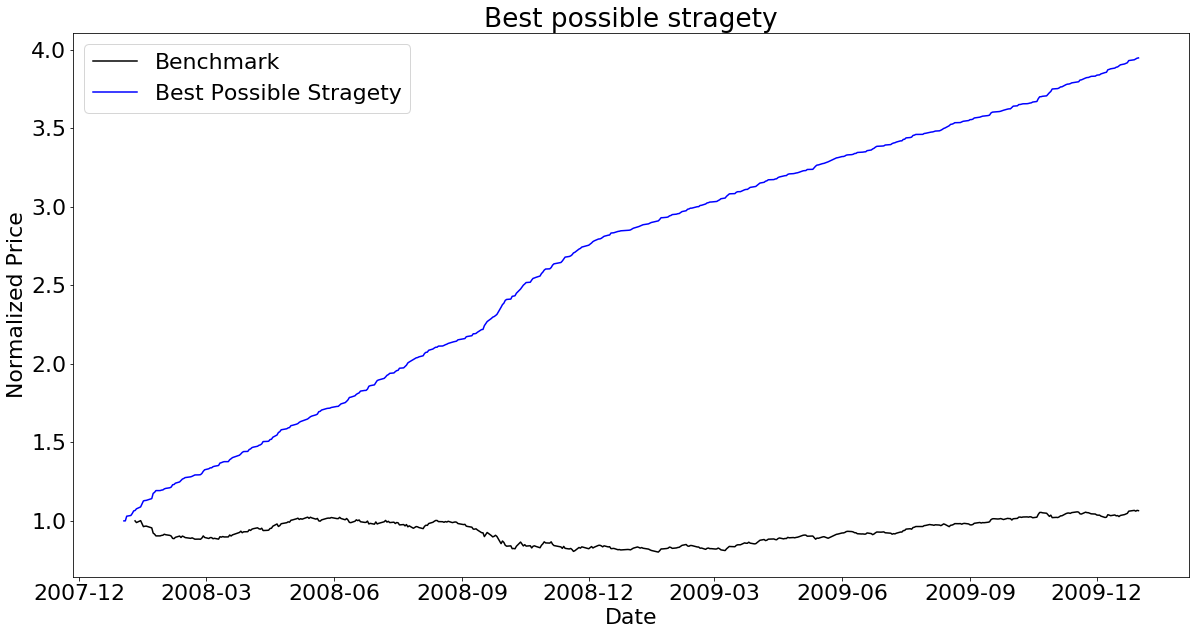

In [4]:
plt.figure(1, figsize=(20,10))
plt.plot(normalize(portfolio_benchmark), color='black')
plt.plot(normalize(best_possible),color='blue')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.title('Best possible stragety')
plt.legend(['Benchmark','Best Possible Stragety'])
plt.show()

In [5]:
cr_best, adr_best, sddr_best, sr_best = portfolio_stat(best_possible)

In [6]:
cr_bech, adr_bech, sddr_bech, sr_bech = portfolio_stat(portfolio_benchmark)

In [7]:
print cr_best, adr_best, sddr_best, sr_best

Portfolio    2.94948
dtype: float64 Portfolio    0.002734
dtype: float64 Portfolio    0.003219
dtype: float64 Portfolio    13.482168
dtype: float64


In [8]:
print cr_bech, adr_bech, sddr_bech, sr_bech

Portfolio    0.06514
dtype: float64 Portfolio    0.000161
dtype: float64 Portfolio    0.008316
dtype: float64 Portfolio    0.308002
dtype: float64
